In [1]:
# Simplified Example for Diffusion Model (Image Generation)
# Note: This is a placeholder; actual diffusion models need extensive setups

import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load pre-trained model (example)
# In practice, load a diffusion model or a generative model
# Here we assume 'DiffusionModel' is a placeholder
model = torch.hub.load('CompVis/stable-diffusion', 'stable-diffusion-v1')

# Load and preprocess an image
image = Image.open('/content/Traditional-Japanese-Style-Landscape-Watercolor-Painting-Mural-Wallpaper-M.jpg')
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor()
])
input_image = transform(image).unsqueeze(0)

# Generate a new image from the input
generated_image = model(input_image)

# Convert the generated tensor back to an image
generated_image_pil = transforms.ToPILImage()(generated_image.squeeze(0))

# Display the generated image
plt.imshow(generated_image_pil)
plt.show()


/usr/local/lib/python3.10/dist-packages/torch/hub.py:295: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/CompVis/stable-diffusion/zipball/main" to /root/.cache/torch/hub/main.zip


FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/torch/hub/CompVis_stable-diffusion_main/hubconf.py'

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

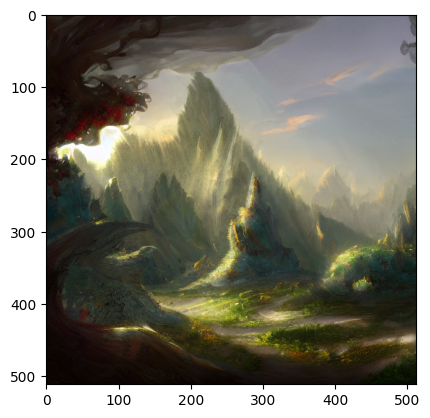

In [2]:
!pip install diffusers transformers accelerate
import torch
from diffusers import StableDiffusionPipeline
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load pre-trained model
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")


# Load and preprocess an image
image = Image.open('/content/Traditional-Japanese-Style-Landscape-Watercolor-Painting-Mural-Wallpaper-M.jpg')
transform = transforms.Compose([
    transforms.Resize((512, 512)), #Resize to match model input
    transforms.ToTensor()
])
input_image = transform(image).unsqueeze(0).to("cuda") #Move input to cuda

#You're using the Stable Diffusion pipeline, which doesn't take an image directly as input
#Instead it takes a text prompt and generates an image based on that prompt.
prompt = "A fantasy landscape, trending on artstation"
generated_image = pipe(prompt).images[0]


# Display the generated image
plt.imshow(generated_image)
plt.show()